In [17]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [210]:
def bbox_intersect(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2
    return x2 > x3 and x4 > x1 and y2 > y3 and y4 > y1

In [36]:
def divide_bboxes(bbox1, bbox2):
    x1, y1, x2, y2 = bbox1
    x3, y3, x4, y4 = bbox2

    divided_boxes = []
    if x3 > x1:
        divided_boxes.append([x1, y1, x3, y2])  # Left part
    if x4 < x2:
        divided_boxes.append([x4, y1, x2, y2])  # Right part
    if y3 > y1:
        divided_boxes.append([x1, y1, x2, y3])  # Top part
    if y4 < y2:
        divided_boxes.append([x1, y4, x2, y2])  #Bottom part
    return divided_boxes

In [37]:
def area(bbox):
    x1, y1, x2, y2 = bbox
    return (x2 - x1) * (y2 - y1)

In [211]:
global background_bbox
background_bbox = [0, 0, 0, 0]
def get_background_bboxes(handled_bbox, bboxes):
    global background_bbox
    if len(bboxes) != 0:
        bbox = bboxes[0]
        divided_bboxes = divide_bboxes(handled_bbox, bbox)
        for divided_bbox in divided_bboxes:
            if area(divided_bbox) > area(background_bbox):
                get_background_bboxes(divided_bbox, [bb for bb in bboxes if bbox_intersect(divided_bbox, bb)])
    else:
        if area(handled_bbox) > area(background_bbox):
            background_bbox = handled_bbox

In [2]:
dataset = load_dataset("detection-datasets/coco")

In [316]:
sample = dataset['train'][126]
image = sample['image']
bboxes = sample['objects']['bbox']
labels = sample["objects"]["category"]

In [317]:
global background_bbox
background_bbox = [0, 0, 0, 0]
get_background_bboxes([0, 0, image.size[0], image.size[1]], bboxes)
background_bbox

[0, 108.5, 189.86, 472]

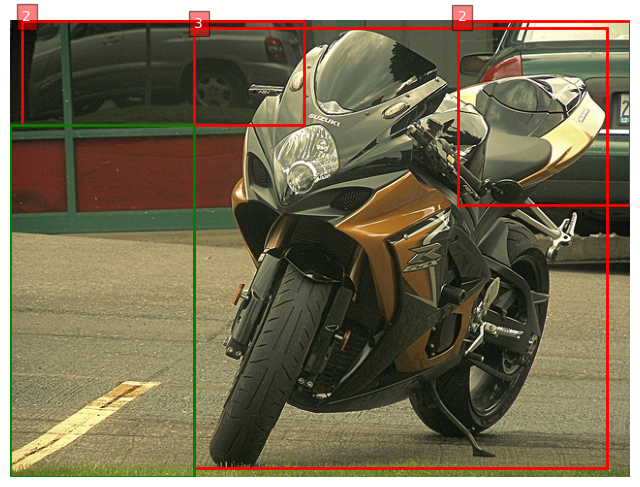

In [318]:
fig, ax = plt.subplots(1, figsize=(8, 8))
ax.imshow(image)

# Add bounding boxes
for bbox, label in zip(bboxes, labels):
    x1, y1, x2, y2 = bbox
    w, h = x2 - x1, y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                             edgecolor="red", facecolor="none")
    ax.add_patch(rect)
    ax.text(x1, y1, label, color="white", fontsize=10,
            bbox=dict(facecolor="red", alpha=0.5))

x1, y1, x2, y2 = background_bbox
w, h = x2 - x1, y2 - y1
rect = patches.Rectangle((x1, y1), w, h, linewidth=2,
                         edgecolor="green", facecolor="none")
ax.add_patch(rect)

plt.axis("off")
plt.show()